In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt#visualization
import plotly.express as px
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

In [3]:
df = pd.read_excel("C:\\Users\\Asus\\Downloads\\Data_Project7.xlsx")

In [4]:
#overview of the data 
df.head(500)

,,rating,Domain,ratingDescription,release year,user rating score,user rating size
0,Minions,PG,action and rude humor,60.0,2015,96.0,80
1,Minions,PG,action and rude humor,60.0,2015,96.0,80
2,Ratchet and Clank,PG,action and some rude humor,60.0,2016,74.0,80
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60.0,2014,NaN,82
4,Spy Kids 3: Game Over,PG,action sequences and peril,60.0,2003,64.0,80
...,...,...,...,...,...,...,...
495,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016,98.0,80
496,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016,98.0,80
497,Halt and Catch Fire,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016,NaN,82
498,Halt and Catch Fire,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016,NaN,82


In [5]:
#changing the column names
df1=df.rename(columns = {' ': 'Title','Domain ': 'Domain', 'ratingDescription': 'ratingdesc','release year':'releaseyr','user rating score':'urscore','user rating size':'ursize'})


In [6]:
df1.shape

(1000, 7)

In [7]:
# check the column name 
df1.columns

Index(['Title', 'rating', 'Domain', 'ratingdesc', 'releaseyr', 'urscore',
       'ursize'],
      dtype='object')

In [8]:
#dropping duplicate rows
df2 = df1.drop_duplicates()

In [9]:
df2.shape

(501, 7)

In [10]:
# Checking for null values in every column
df2.isnull().sum()

Title           0
rating          0
Domain         33
ratingdesc      1
releaseyr       0
urscore       245
ursize          0
dtype: int64

In [11]:
#To understand the percentage of Nan values in each columns of the data. - AVIK SHAH
nan_cols = df2.isna().sum()/len(df2)*100
nan_cols

Title          0.000000
rating         0.000000
Domain         6.586826
ratingdesc     0.199601
releaseyr      0.000000
urscore       48.902196
ursize         0.000000
dtype: float64

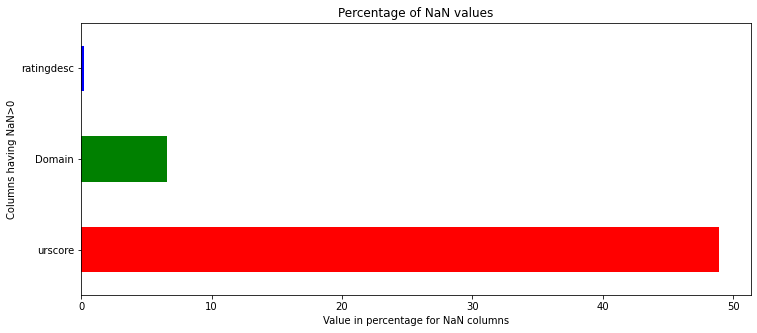

In [12]:
#Plot the NaN percentage using a BARPLOT  - AVIK SHAH

ax= nan_cols[nan_cols>0].sort_values(ascending=False).plot.barh(title='Percentage of NaN values', color = list('rgbkymc'), figsize=(12,5));
ax.set_xlabel('Value in percentage for NaN columns')
ax.set_ylabel('Columns having NaN>0');

In [13]:
# removing null values from 'Domain'
df2.loc[(df2["Domain"].isnull()) & (df2["rating"]=="TV-MA"), "Domain"] = 'For mature audiences.  May not be suitable for children 17 and under.'
df2.loc[(df2["Domain"].isnull()) & (df2["rating"]=="TV-14"), "Domain"] = 'Parents strongly cautioned. May be unsuitable for children ages 14 and under.'
df2.loc[(df2["Domain"].isnull()) & (df2["rating"]=="G"), "Domain"] = "General Audiences. Suitable for all ages."
df2.loc[(df2["Domain"].isnull()) & (df2["rating"]=="NR"), "Domain"] = "This movie has not been rated."
df2.loc[(df2["Domain"].isnull()) & (df2["rating"]=="TV-PG"), "Domain"]="Parental guidance suggested. May not be suitable for all children."



In [14]:
#check if null values removed
df2.Domain.isnull().sum()

0

In [15]:
#imputing null values for ratingdesc col
df2.loc[(df2["ratingdesc"].isnull()) & (df2["rating"]=="PG"), "ratingdesc"] = 60

In [16]:
df2.ratingdesc.isnull().sum()

0

In [17]:
#checking null values for urscore column
df2.urscore.isnull().sum()

245

In [18]:
#impute null values of urscore by average urscore of each category 
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-MA"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-MA']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-PG"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-PG']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="PG"), "urscore"] = df2.groupby('rating').urscore.mean().loc['PG']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="PG-13"), "urscore"] = df2.groupby('rating').urscore.mean().loc['PG-13']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="G"), "urscore"] = df2.groupby('rating').urscore.mean().loc['G']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-14"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-14']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-G"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-G']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-Y"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-Y']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-Y7"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-Y7']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="TV-Y7-FV"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-Y7-FV']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="NR"), "urscore"] = df2.groupby('rating').urscore.mean().loc['NR']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="R"), "urscore"] = df2.groupby('rating').urscore.mean().loc['R']
df2.loc[(df2["urscore"].isnull()) & (df2["rating"]=="UR"), "urscore"] = df2.groupby('rating').urscore.mean().loc['TV-MA']


In [19]:
#check for null values again 
df2.urscore.isnull().sum()

0

In [20]:
#creating new column of type which tells us that title is based on MOvie or a TV series with the help of Rating
movie    = df2[(df2["rating"] == "G") | (df2["rating"] == "NR") | (df2["rating"] == "PG") | (df2["rating"] == "PG-13") | (df2["rating"] == "R") | (df2["rating"] == "UR")].index
df2.loc[movie,'type']="movie"
tv_series = df2[ (df2["rating"] == "TV-Y7") | (df2["rating"] == "TV-14") | (df2["rating"] == "TV-G") | (df2["rating"] == "TV-MA") | (df2["rating"] == "TV-PG") | (df2["rating"] == "TV-Y") | (df2["rating"] == "TV-Y7-FV")].index
df2.loc[tv_series,'type']="tv_series"

In [21]:
df2.head()

,Title,rating,Domain,ratingdesc,releaseyr,urscore,ursize,type
0,Minions,PG,action and rude humor,60.0,2015,96.000000,80,movie
2,Ratchet and Clank,PG,action and some rude humor,60.0,2016,74.000000,80,movie
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60.0,2014,84.104167,82,movie
4,Spy Kids 3: Game Over,PG,action sequences and peril,60.0,2003,64.000000,80,movie
5,Atlantis: The Lost Empire,PG,action violence,60.0,2001,96.000000,80,movie


## Exploratory Data Analysis

In [22]:
df2.describe()

,ratingdesc,releaseyr,urscore,ursize
count,501.000000,501.000000,501.000000,501.000000
mean,68.736527,2010.986028,80.373031,80.974052
std,31.475998,7.824692,9.755196,0.998662
min,10.000000,1940.000000,55.000000,80.000000
25%,41.000000,2009.000000,74.421053,80.000000
50%,70.000000,2014.000000,82.870130,80.000000
75%,90.000000,2016.000000,85.000000,82.000000
max,124.000000,2017.000000,99.000000,82.000000


In [23]:
df2.describe(include='all')

,Title,rating,Domain,ratingdesc,releaseyr,urscore,ursize,type
count,501,501,501,501.000000,501.000000,501.000000,501.000000,501
unique,496,13,99,NaN,NaN,NaN,NaN,2
top,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,NaN,NaN,NaN,NaN,tv_series
freq,2,106,105,NaN,NaN,NaN,NaN,334
mean,NaN,NaN,NaN,68.736527,2010.986028,80.373031,80.974052,NaN
std,NaN,NaN,NaN,31.475998,7.824692,9.755196,0.998662,NaN
min,NaN,NaN,NaN,10.000000,1940.000000,55.000000,80.000000,NaN
25%,NaN,NaN,NaN,41.000000,2009.000000,74.421053,80.000000,NaN
50%,NaN,NaN,NaN,70.000000,2014.000000,82.870130,80.000000,NaN
75%,NaN,NaN,NaN,90.000000,2016.000000,85.000000,82.000000,NaN


In [24]:
df2.nunique()

Title         496
rating         13
Domain         99
ratingdesc     11
releaseyr      35
urscore        53
ursize          3
type            2
dtype: int64

In [25]:
df2['rating'].unique()


array(['PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'G', 'TV-PG', 'TV-G', 'TV-Y',
       'TV-Y7', 'TV-Y7-FV', 'NR', 'UR'], dtype=object)

In [26]:
#To understand the percentage of Nan values in each columns of the data.
nan_cols = df2.isna().sum()/len(df2)*100
nan_cols

Title         0.0
rating        0.0
Domain        0.0
ratingdesc    0.0
releaseyr     0.0
urscore       0.0
ursize        0.0
type          0.0
dtype: float64

<AxesSubplot:>

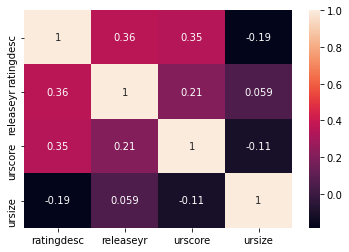

In [27]:
#relatioship analysis
corelation = df2.corr()
sns.heatmap(corelation, xticklabels= corelation.columns, yticklabels= corelation.columns, annot= True)

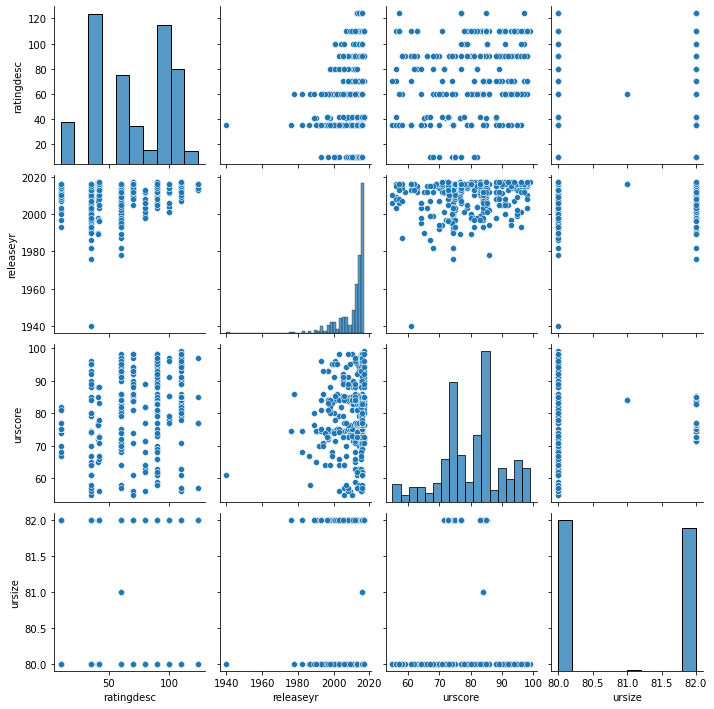

In [28]:
sns.pairplot(df2)

<AxesSubplot:xlabel='ratingdesc', ylabel='count'>

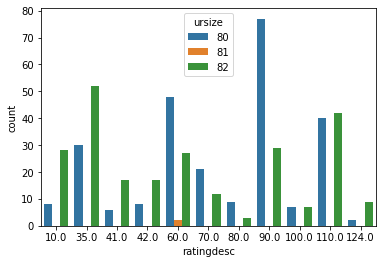

In [251]:
sns.countplot(x = 'ratingdesc', data = df2, hue = 'ursize')

<AxesSubplot:xlabel='ratingdesc', ylabel='count'>

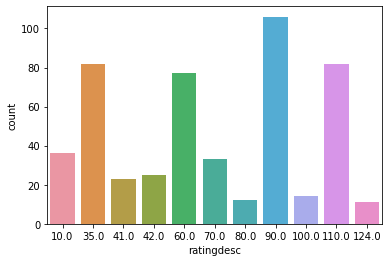

In [252]:
sns.countplot(x = 'ratingdesc', data = df2)

<AxesSubplot:xlabel='ratingdesc', ylabel='Density'>

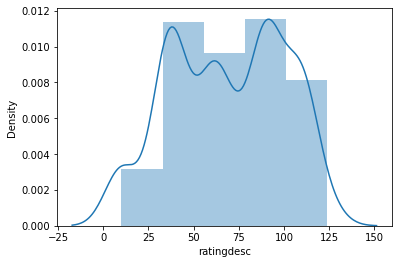

In [253]:
sns.distplot(df2['ratingdesc'], bins=5)

<AxesSubplot:xlabel='releaseyr', ylabel='Density'>

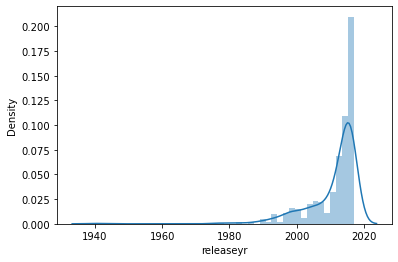

In [254]:
sns.distplot(df2['releaseyr'])

<AxesSubplot:xlabel='urscore', ylabel='Density'>

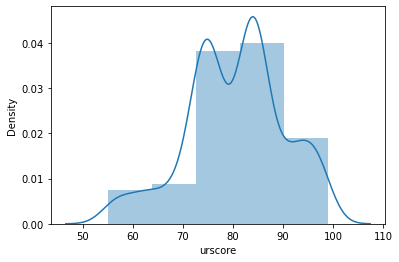

In [255]:
sns.distplot(df2['urscore'], bins=5)

<AxesSubplot:xlabel='ursize', ylabel='Density'>

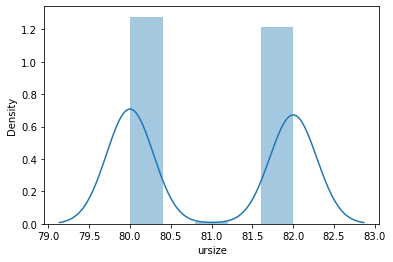

In [256]:
sns.distplot(df2['ursize'],bins=5)

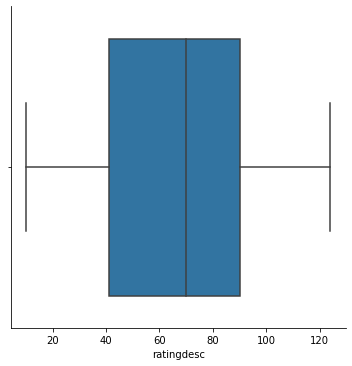

In [257]:
sns.catplot(x='ratingdesc', kind='box', data= df2)

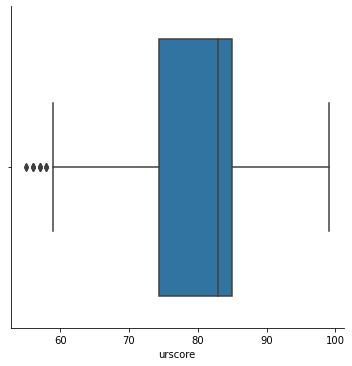

In [258]:
sns.catplot(x='urscore', kind='box', data= df2)

In [259]:
#Number of unique movies
uniq_movies = df2['Title'].nunique()
uniq_movies

496

In [260]:
#no. of unique domain description
uniq_domain = df2['Domain'].nunique()
uniq_domain

99

In [261]:
#Number of movies in each Domain?
domain_df = df2['Domain'].value_counts().reset_index().rename(columns={'Domain':'Count','index':'Domain'})
domain_df

,Domain,Count
0,Parents strongly cautioned. May be unsuitable ...,105
1,For mature audiences. May not be suitable for...,82
2,Suitable for all ages.,65
3,General Audiences. Suitable for all ages.,53
4,Parental guidance suggested. May not be suitab...,33
...,...,...
94,"scary images, suggestive material, some langua...",1
95,"strong violence, sexual content and adult lang...",1
96,"rude and suggestive humor, and some action",1
97,"language, some drug use, violence and partial ...",1


In [29]:
#Plot the count of movies based on 'Domain'
plt.figure(figsize=(12,8))
plt.rcParams['font.size']=14
sns.barplot(x='Domain',y='Count',data=domain_df.head(20))
plt.title('Top 20 movies Domain')
plt.xlabel('Domain')
plt.xticks(rotation=90);

NameError: name 'domain_df' is not defined

<Figure size 864x576 with 0 Axes>

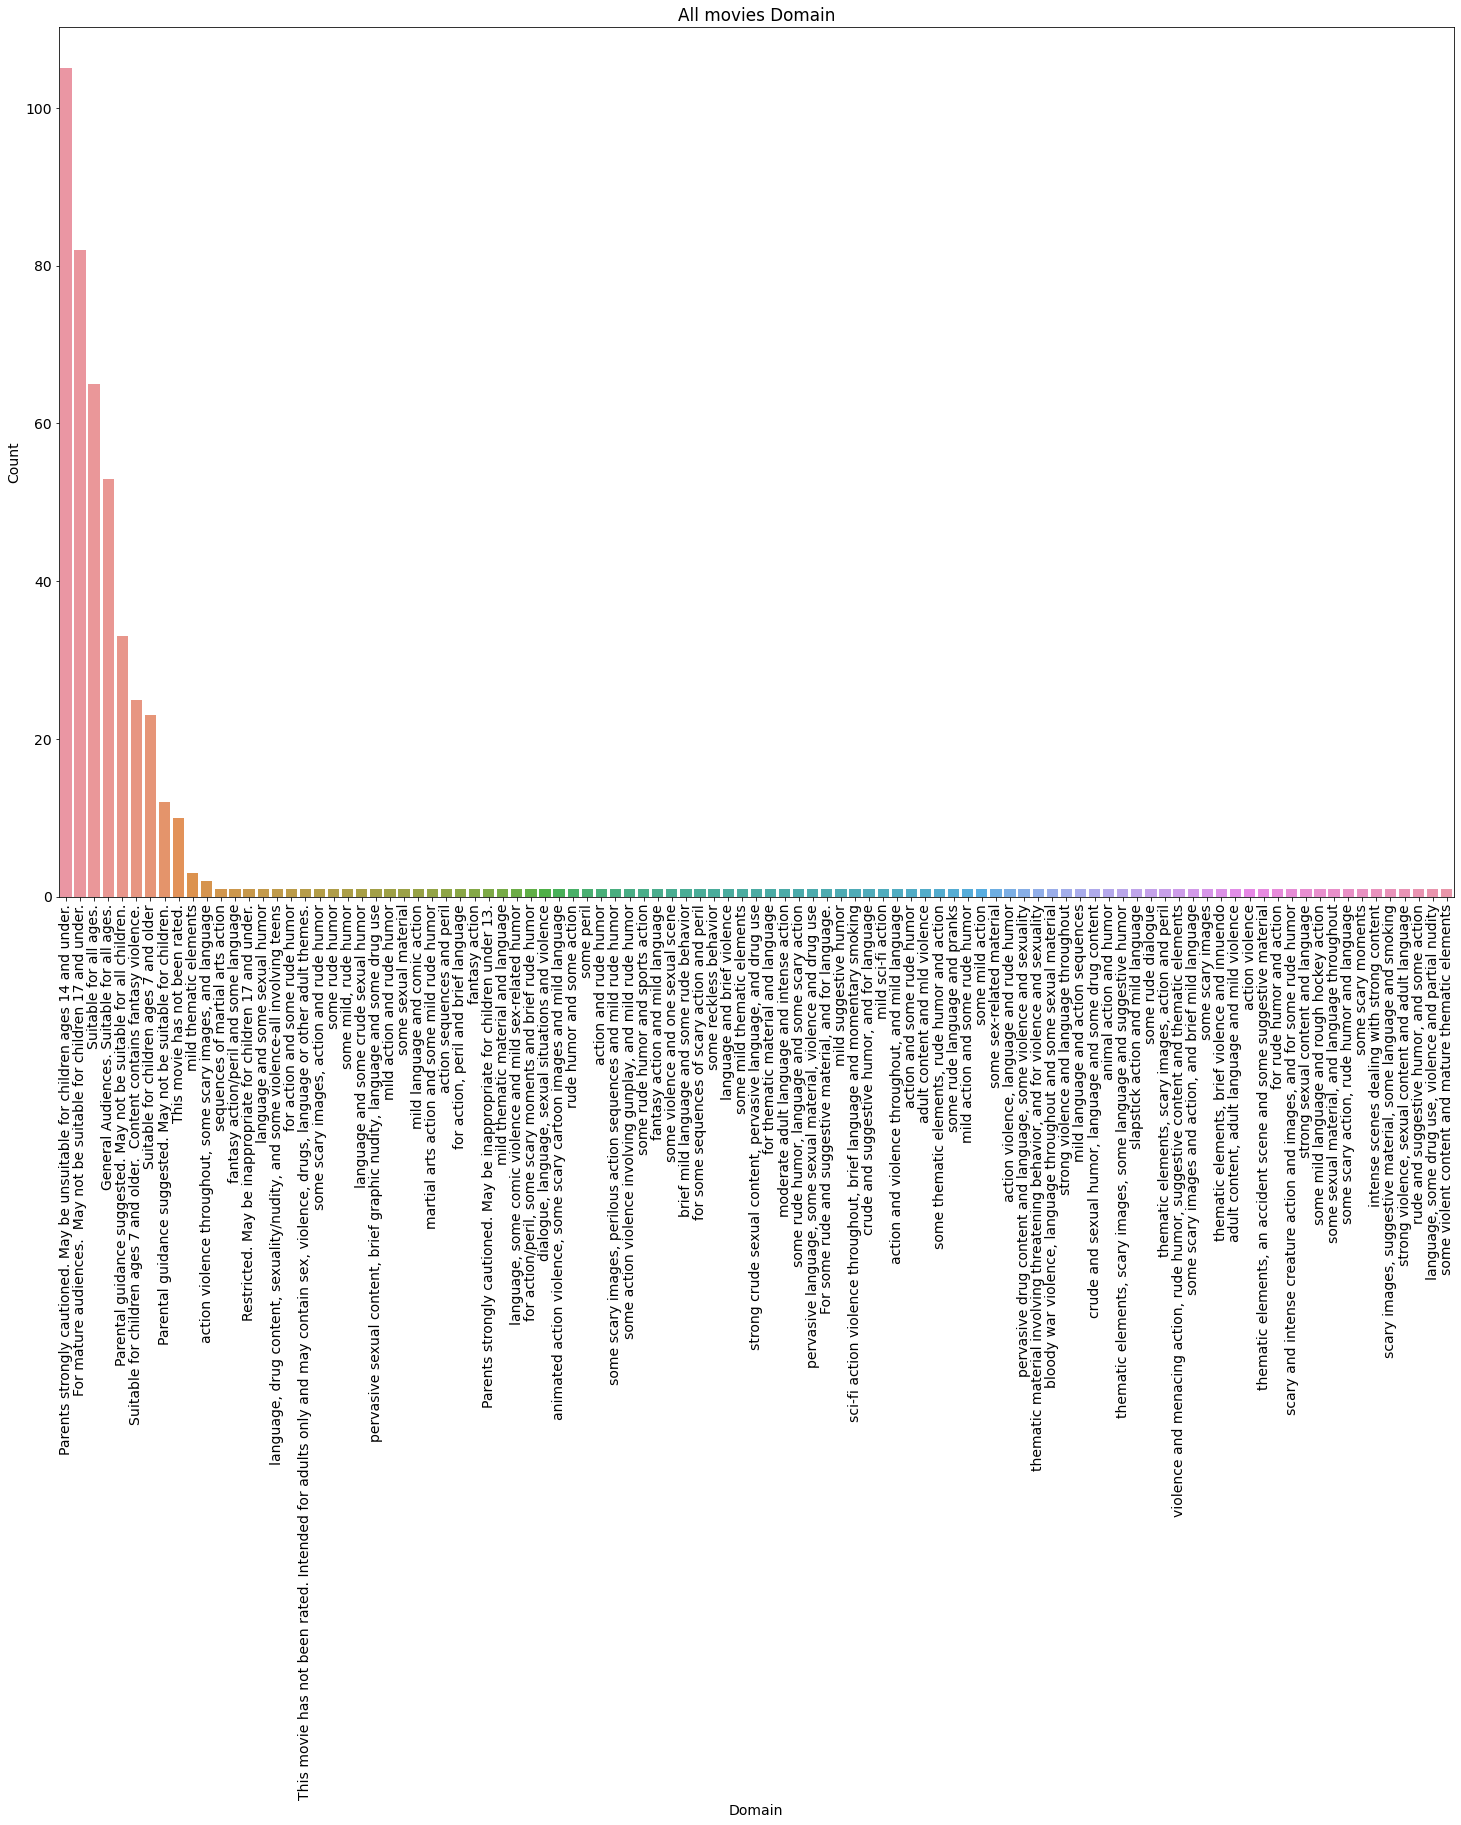

In [263]:
#Plot the count of movies based on 'Domain'
plt.figure(figsize=(25,16))
plt.rcParams['font.size']=14
sns.barplot(x='Domain',y='Count',data=domain_df)
plt.title('All movies Domain')
plt.xlabel('Domain')
plt.xticks(rotation=90);

In [30]:
# Percentage count of content in terms of Rating 
plot1 = df2.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(plot1, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Boombox',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [266]:
#percentage count of the type of content (based on the new column created)
plot2 = df2.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(plot2, values='counts', names='type', 
                  title='Distribution of Content on Boombox',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [268]:
# distribution of rating wrt urscore (each dot represent a title, hover to see the title )
plot3 = px.scatter(df2, x="rating", y="urscore", color="Title", size='urscore',height=1080,width=1080)
plot3.show()

In [83]:
# BAr plot that helps to know the content of type released every year and the urscore they fetch
plot4 = px.bar(df2, x="releaseyr", y="urscore", color="type", title="User score by type")
plot4.show()

In [87]:
#distribution of movies and tv series and the urcore each rating fetched  
plot5 = px.scatter(df2, x='rating', y='urscore', color='type', size='urscore')
plot5.show()

In [88]:
# similar to previous graph but included the release year instead rating: helps to understand what movies preferred over the year
plot6 = px.scatter(df2, x='releaseyr', y='urscore', color='type', size='urscore')
plot6.show()

In [96]:
plot7 = px.scatter(df2, x='releaseyr', y='urscore', color='rating', )

plot9 = px.scatter(df2, x='rating', y='releaseyr', color='urscore', size='urscore')
plot9.show(),
plot7.show()

In [94]:
#every content was checked based on their rating and ur score and see a general overview
plot8 = px.scatter(df2, x='urscore', y='Title', color='rating', )
plot8.show()

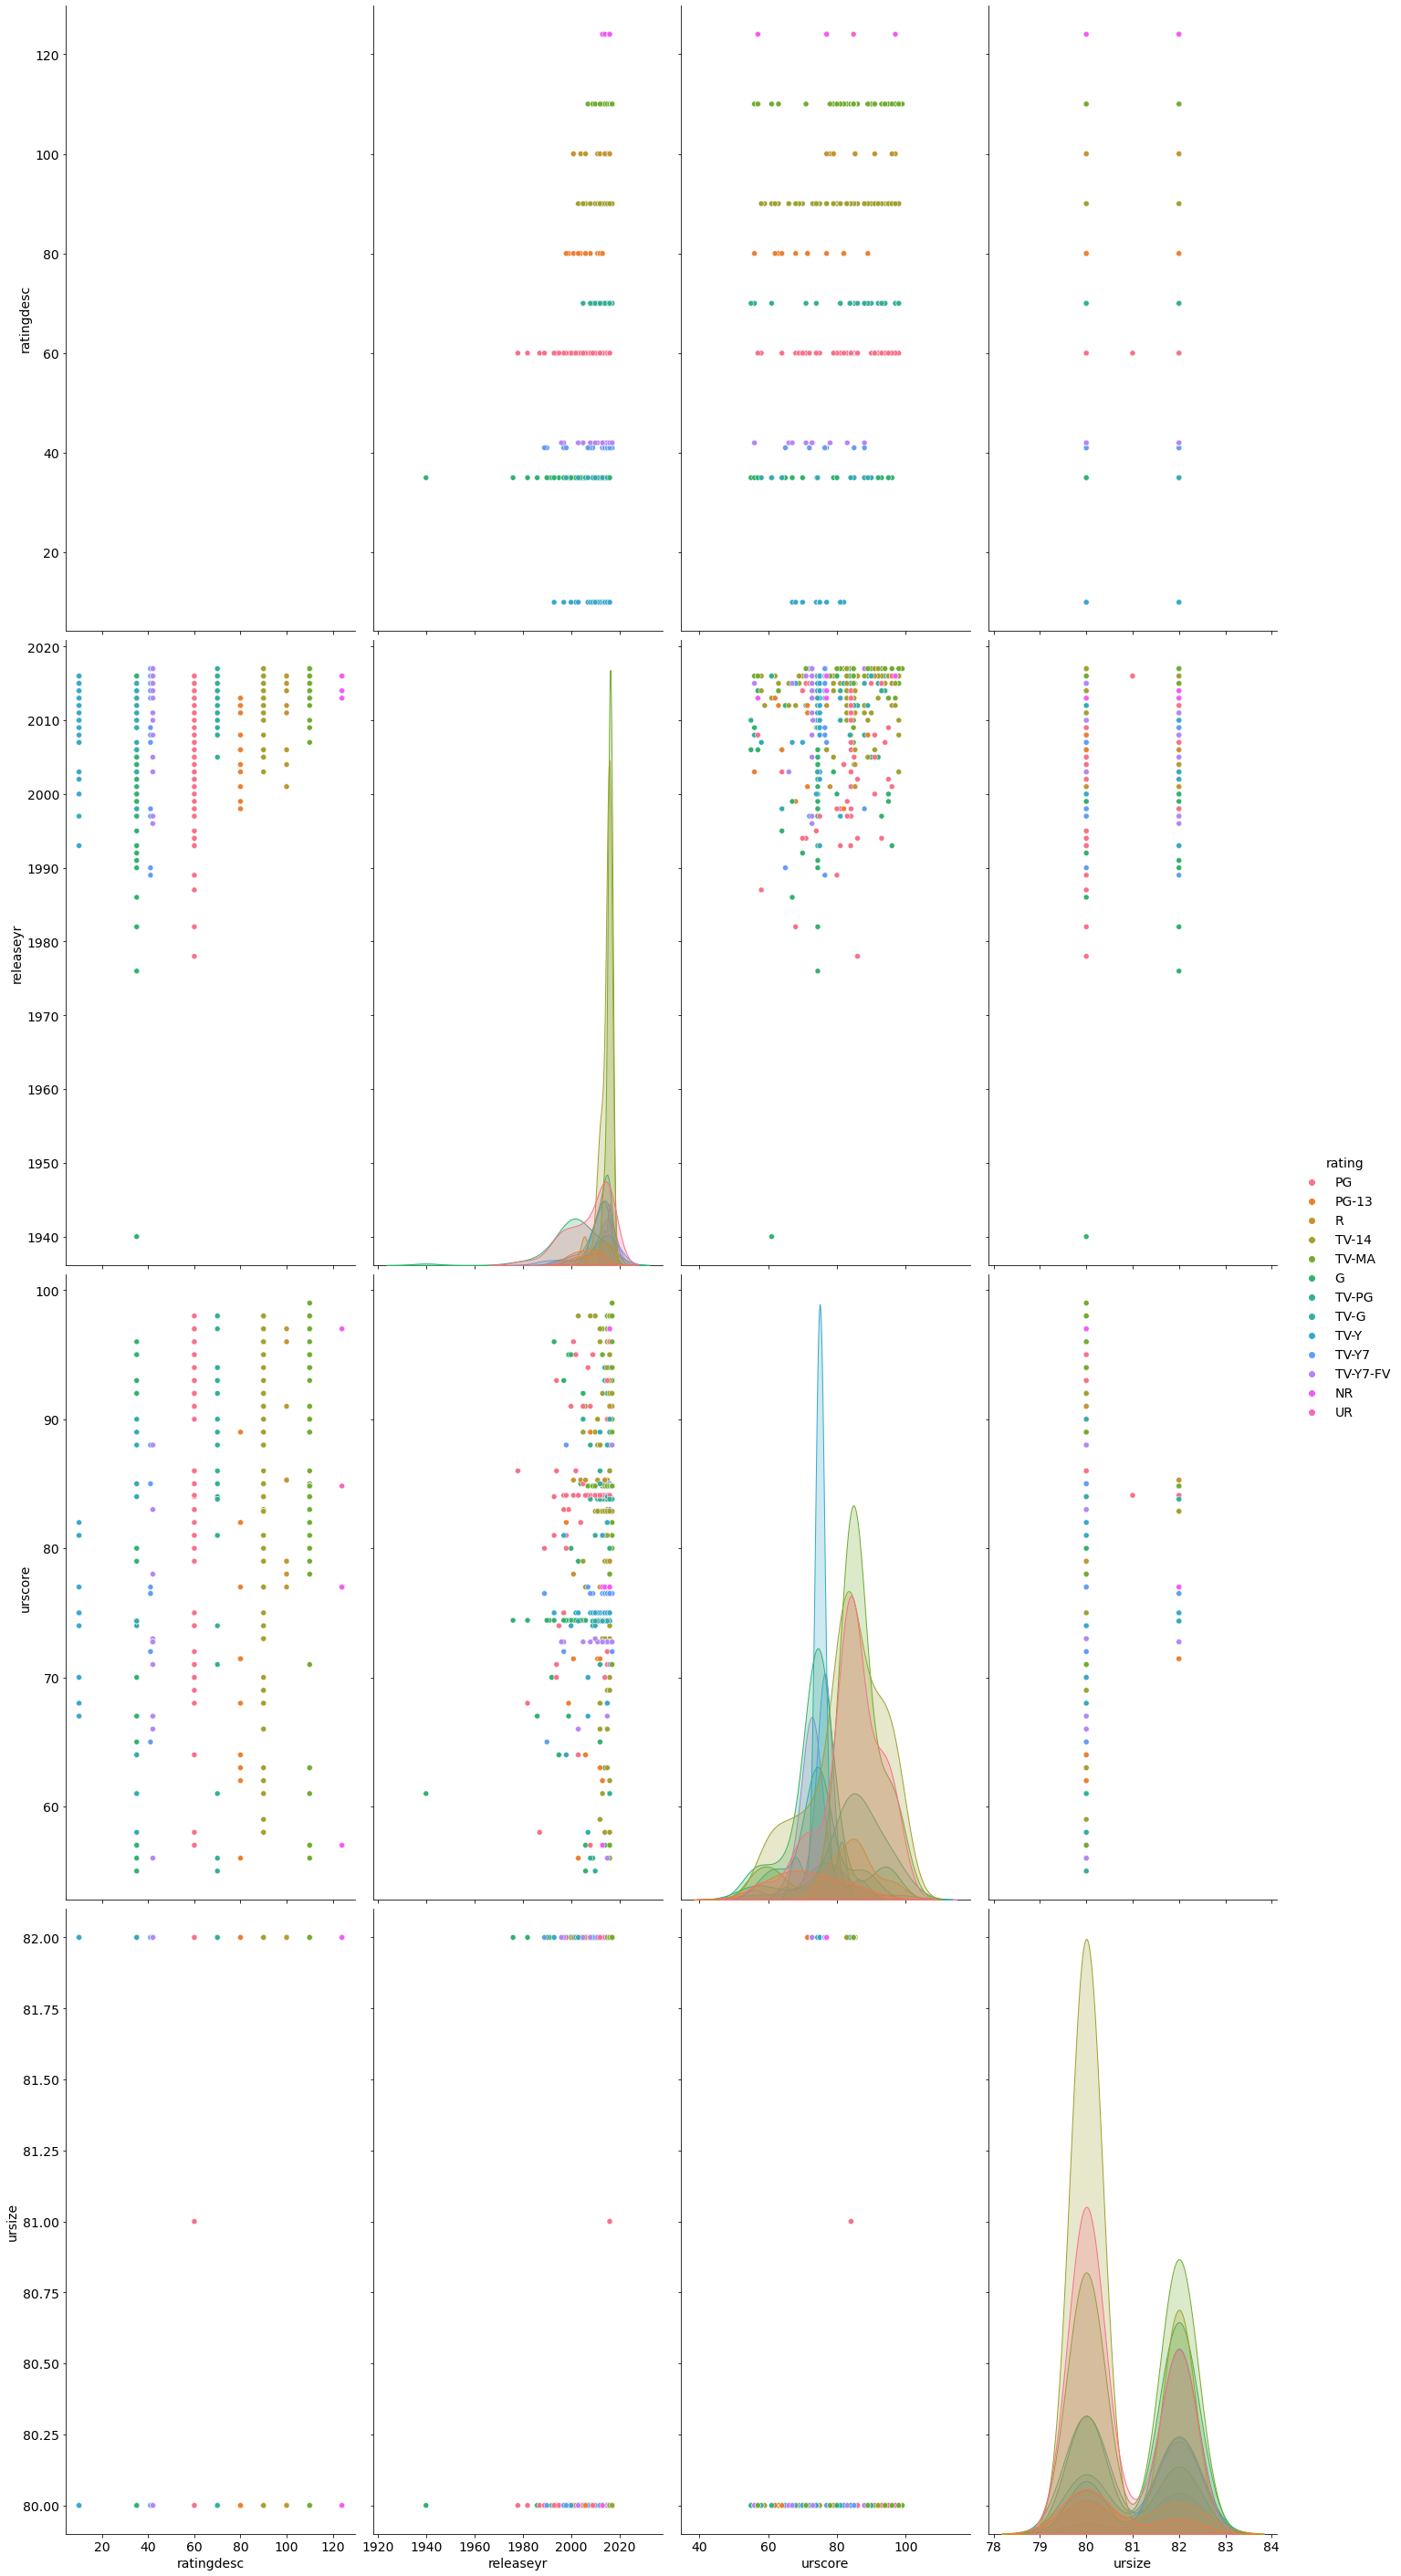

In [97]:
sns.pairplot(df2, kind = 'scatter', height = 10, aspect = 0.5, hue = 'rating')

In [98]:
fig = px.scatter(df2, x='ratingdesc', y='urscore', color='rating', hover_name= 'Title')
fig.show()

# CLRM & MLRM

In [297]:
data_dummy_3 = pd.get_dummies(df2[['rating', 'Domain']])
data_num = df2[['ratingdesc', 'releaseyr', 'urscore', 'ursize']]
data_combine_3 = pd.concat ([data_num, data_dummy_3], axis = 1)
data_combine_3.head()

,ratingdesc,releaseyr,urscore,ursize,rating_G,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,...,"Domain_strong crude sexual content, pervasive language, and drug use",Domain_strong sexual content and language,Domain_strong violence and language throughout,"Domain_strong violence, sexual content and adult language","Domain_thematic elements, an accident scene and some suggestive material","Domain_thematic elements, brief violence and innuendo","Domain_thematic elements, scary images, action and peril","Domain_thematic elements, scary images, some language and suggestive humor","Domain_thematic material involving threatening behavior, and for violence and sexuality","Domain_violence and menacing action, rude humor, suggestive content and thematic elements"
0,60.0,2015,96.000000,80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.0,2016,74.000000,80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,2014,84.104167,82,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,2003,64.000000,80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60.0,2001,96.000000,80,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
x_a = data_combine_3 [['ratingdesc']]
y = data_combine_3 [['urscore']]

In [299]:
x_train, x_test, y_train, y_test = train_test_split( x_a, y, train_size = 0.7, random_state = 100 )

In [300]:
lm_a = LinearRegression()

In [301]:
# fit the model in training data
lm_a.fit(x_train, y_train)

LinearRegression()

In [302]:
x_a_1 = sm.add_constant(x_a)
model_a = sm.OLS(y, x_a).fit()

In [303]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                urscore   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              2758.
Date:                Mon, 26 Jul 2021   Prob (F-statistic):                   1.24e-205
Time:                        15:48:54   Log-Likelihood:                         -2442.8
No. Observations:                 501   AIC:                                      4888.
Df Residuals:                     500   BIC:                                      4892.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ratingdesc     0.9855      0.019     52.516      0.000       0.949       1.022
==============================================================================
Omnibus:                       49.731   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.289
Skew:                          -0.038   Prob(JB):                     0.000479
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Evaluation 

In [304]:
print (lm_a.intercept_)

[72.41596679]


# PREDICTION

In [305]:
y_pred = lm_a.predict(x_test)
y_pred

array([[85.25300091],
       [85.25300091],
       [86.88680525],
       [76.50047765],
       [85.25300091],
       [79.4179854 ],
       [86.88680525],
       [77.20067951],
       [79.4179854 ],
       [76.50047765],
       [81.7519916 ],
       [85.25300091],
       [82.91899471],
       [82.91899471],
       [79.4179854 ],
       [82.91899471],
       [80.5849885 ],
       [82.91899471],
       [82.91899471],
       [76.50047765],
       [82.91899471],
       [77.20067951],
       [76.50047765],
       [76.50047765],
       [80.5849885 ],
       [79.4179854 ],
       [76.50047765],
       [79.4179854 ],
       [82.91899471],
       [85.25300091],
       [73.58296989],
       [82.91899471],
       [82.91899471],
       [82.91899471],
       [79.4179854 ],
       [73.58296989],
       [77.20067951],
       [73.58296989],
       [85.25300091],
       [79.4179854 ],
       [76.50047765],
       [82.91899471],
       [85.25300091],
       [84.08599781],
       [79.4179854 ],
       [73

In [306]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared =r2_score(y_test, y_pred)
from math import sqrt
rmse = sqrt(mse)

In [307]:
print('Mean_squared_error -', mse)
print('root_Mean_squared_error -', rmse)
print('r_squared_value- ', r_squared)

Mean_squared_error - 87.04496206940676
root_Mean_squared_error - 9.329788961675755
r_squared_value-  0.08737662680483627


In [308]:
#ITERATION 2 
x_b = data_combine_3 [['ratingdesc', 'releaseyr']]
y = data_combine_3 [['urscore']]

In [309]:
x_train, x_test, y_train, y_test = train_test_split( x_b, y, train_size = 0.7, random_state = 100 )

In [310]:
lm_b = LinearRegression()

In [311]:
# fit the model in training data
lm_b.fit(x_train, y_train)

LinearRegression()

In [312]:
x_b_1 = sm.add_constant(x_b)
model_b = sm.OLS(y, x_b).fit()

In [313]:
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                urscore   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.941e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:49:08   Log-Likelihood:                         -1818.4
No. Observations:                 501   AIC:                                      3641.
Df Residuals:                     499   BIC:                                      3649.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ratingdesc     0.1038      0.013      7.966      0.000       0.078       0.129
releaseyr      0.0364      0.000     74.395      0.000       0.035       0.037
==============================================================================
Omnibus:                       33.525   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.388
Skew:                          -0.580   Prob(JB):                     1.03e-09
Kurtosis:                       3.798   Cond. No.                         64.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
print(lm_b.intercept_)

[-160.55423769]


In [315]:
y_pred_1 = lm_b.predict(x_test)
y_pred_1

array([[85.37221665],
       [85.37221665],
       [86.6175267 ],
       [77.10693026],
       [85.48844455],
       [77.53746782],
       [86.6175267 ],
       [77.85648637],
       [77.53746782],
       [75.36351183],
       [80.46215714],
       [85.48844455],
       [82.79621102],
       [83.2611226 ],
       [79.74579783],
       [83.2611226 ],
       [81.15002854],
       [83.1448947 ],
       [82.91243891],
       [76.64201868],
       [83.2611226 ],
       [77.97271426],
       [75.01482814],
       [77.10693026],
       [79.87152169],
       [79.39711414],
       [75.59596762],
       [79.97825362],
       [83.1448947 ],
       [85.37221665],
       [74.119379  ],
       [82.91243891],
       [83.1448947 ],
       [83.2611226 ],
       [78.58351887],
       [74.81674637],
       [77.97271426],
       [74.70051848],
       [85.02353297],
       [80.09448151],
       [76.99070236],
       [83.2611226 ],
       [85.37221665],
       [83.73553015],
       [77.42123992],
       [74

In [ ]:
# ITERATION 3 

In [113]:
x_c = data_combine_3 [['ratingdesc', 'releaseyr', 'ursize']]
y = data_combine_3 [['urscore']]

In [114]:
x_train, x_test, y_train, y_test = train_test_split( x_c, y, train_size = 0.7, random_state = 100 )

In [115]:
lm_c = LinearRegression()

In [116]:
# fit the model in training data
lm_c.fit(x_train, y_train)

LinearRegression()

In [117]:
x_c_1 = sm.add_constant(x_c)
model_c = sm.OLS(y, x_c).fit()

In [118]:
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                urscore   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.299e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):                        0.00
Time:                        10:59:00   Log-Likelihood:                         -1817.0
No. Observations:                 501   AIC:                                      3640.
Df Residuals:                     498   BIC:                                      3653.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ratingdesc     0.0972      0.014      7.160      0.000       0.071       0.124
releaseyr      0.0644      0.017      3.831      0.000       0.031       0.097
ursize        -0.6893      0.414     -1.665      0.097      -1.503       0.124
==============================================================================
Omnibus:                       51.607   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.355
Skew:                          -0.765   Prob(JB):                     8.71e-16
Kurtosis:                       3.991   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# p-value for ursize is 0.097 indicating a not good fit model

In [119]:
# ITERATION 4

In [316]:
x_d = data_combine_3 [['rating_G', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR']]
y = data_combine_3 [['urscore']]

In [317]:
x_train, x_test, y_train, y_test = train_test_split( x_d, y, train_size = 0.7, random_state = 100 )

In [318]:
lm_d = LinearRegression()

In [319]:
# fit the model in training data
lm_d.fit(x_train, y_train)

LinearRegression()

In [320]:
x_d_1 = sm.add_constant(x_d)
model_d = sm.OLS(y, x_d).fit()

In [321]:
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                urscore   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     12.14
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           1.10e-21
Time:                        15:49:40   Log-Likelihood:                -1786.1
No. Observations:                 501   AIC:                             3598.
Df Residuals:                     488   BIC:                             3653.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rating_G           74.4211      1.190     62.523      0.000      72.082      76.760
rating_NR          77.0000      2.740     28.100      0.000      71.616      82.384
rating_PG          84.1042      0.988     85.167      0.000      82.164      86.044
rating_PG-13       71.4444      2.502     28.561      0.000      66.529      76.359
rating_R           85.2857      2.316     36.826      0.000      80.735      89.836
rating_TV-14       82.8701      0.842     98.460      0.000      81.216      84.524
rating_TV-G        74.3636      1.609     46.213      0.000      71.202      77.525
rating_TV-MA       84.8250      0.957     88.642      0.000      82.945      86.705
rating_TV-PG       83.8095      1.508     55.560      0.000      80.846      86.773
rating_TV-Y        75.0000      1.444     51.930      0.000      72.162      77.838
rating_TV-Y7       76.5000      1.807     42.338      0.000      72.950      80.050
rating_TV-Y7-FV    72.7500      1.733     41.977      0.000      69.345      76.155
rating_UR          84.8250      8.665      9.789      0.000      67.799     101.851
==============================================================================
Omnibus:                       58.829   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.502
Skew:                          -0.738   Prob(JB):                     2.47e-22
Kurtosis:                       4.608   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
print (lm_d.intercept_)

[79.88514855]


In [322]:
# model-1 and model-4 are nearly same but numeric nature of retingdesc avriable affecting positively on fitting of model.

In [128]:
# ITERATION 5 


In [130]:
x_e = data_combine_3 [['rating_G', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'releaseyr', 'ursize']]
y = data_combine_3 [['urscore']]

In [131]:
x_train, x_test, y_train, y_test = train_test_split( x_e, y, train_size = 0.7, random_state = 100 )

In [132]:
lm_e = LinearRegression()

In [133]:
# fit the model in training data
lm_e.fit(x_train, y_train)

LinearRegression()

In [134]:
x_e_1 = sm.add_constant(x_e)
model_e = sm.OLS(y, x_e).fit()

In [135]:
model_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                urscore   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     10.96
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           6.95e-22
Time:                        11:01:51   Log-Likelihood:                -1782.8
No. Observations:                 501   AIC:                             3596.
Df Residuals:                     486   BIC:                             3659.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rating_G         -223.9171    121.730     -1.839      0.066    -463.098      15.264
rating_NR        -223.4756    122.596     -1.823      0.069    -464.359      17.408
rating_PG        -215.2839    122.061     -1.764      0.078    -455.116      24.548
rating_PG-13     -227.8055    122.004     -1.867      0.062    -467.527      11.916
rating_R         -214.6883    122.330     -1.755      0.080    -455.050      25.673
rating_TV-14     -217.6427    122.464     -1.777      0.076    -458.266      22.981
rating_TV-G      -225.6339    122.355     -1.844      0.066    -466.045      14.777
rating_TV-MA     -215.8261    122.570     -1.761      0.079    -456.659      25.007
rating_TV-PG     -216.4793    122.406     -1.769      0.078    -456.989      24.031
rating_TV-Y      -224.8626    122.338     -1.838      0.067    -465.239      15.514
rating_TV-Y7     -223.3196    122.318     -1.826      0.069    -463.657      17.017
rating_TV-Y7-FV  -227.3383    122.405     -1.857      0.064    -467.846      13.169
rating_UR        -215.7491    122.951     -1.755      0.080    -457.331      25.833
releaseyr           0.1548      0.061      2.550      0.011       0.036       0.274
ursize             -0.1408      0.417     -0.338      0.736      -0.960       0.678
==============================================================================
Omnibus:                       63.171   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.624
Skew:                          -0.774   Prob(JB):                     1.57e-24
Kurtosis:                       4.690   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# p-value for user size is 0.736, so we can't take this model
# with adding 3 more variables value of R2 increased but not significantly
# so we reject this model

In [137]:
#ITERATION 6 


In [325]:
x_f = data_combine_3 [['Domain_For mature audiences.  May not be suitable for children 17 and under.',
       'Domain_For some rude and suggestive material, and for language.',
       'Domain_General Audiences. Suitable for all ages.',
       'Domain_Parental guidance suggested. May not be suitable for all children.',
       'Domain_Parental guidance suggested. May not be suitable for children.',
       'Domain_Parents strongly cautioned. May be inappropriate for children under 13.',
       'Domain_Parents strongly cautioned. May be unsuitable for children ages 14 and under.',
       'Domain_Restricted. May be inappropriate for children 17 and under.',
       'Domain_Suitable for all ages.',
       'Domain_Suitable for children ages 7 and older',
       'Domain_Suitable for children ages 7 and older.  Content contains fantasy violence.',
       'Domain_This movie has not been rated.',
       'Domain_This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.',
       'Domain_action and rude humor', 'Domain_action and some rude humor',
       'Domain_action and violence throughout, and mild language',
       'Domain_action sequences and peril', 'Domain_action violence',
       'Domain_action violence throughout, some scary images, and language',
       'Domain_action violence, language and rude humor',
       'Domain_adult content and mld violence',
       'Domain_adult content, adult language and mild violence',
       'Domain_animal action and humor',
       'Domain_animated action violence, some scary cartoon images and mild language',
       'Domain_bloody war violence, language throughout and some sexual material',
       'Domain_brief mild language and some rude behavior',
       'Domain_crude and sexual humor, language and some drug content',
       'Domain_crude and suggestive humor, and for language',
       'Domain_dialogue, language, sexual situations and violence',
       'Domain_fantasy action', 'Domain_fantasy action and mild language',
       'Domain_fantasy action/peril and some language',
       'Domain_for action and some rude humor',
       'Domain_for action, peril and brief language',
       'Domain_for action/peril, some scary moments and brief rude humor',
       'Domain_for rude humor and action',
       'Domain_for some sequences of scary action and peril',
       'Domain_for thematic material and language',
       'Domain_intense scenes dealing with strong content',
       'Domain_language and brief violence',
       'Domain_language and some crude sexual humor',
       'Domain_language and some sexual humor',
       'Domain_language, drug content, sexuality/nudity, and some violence-all involving teens',
       'Domain_language, some comic violence and mild sex-related humor',
       'Domain_language, some drug use, violence and partial nudity',
       'Domain_martial arts action and some mild rude humor',
       'Domain_mild action and rude humor',
       'Domain_mild action and some rude humor',
       'Domain_mild language and action sequences',
       'Domain_mild language and comic action', 'Domain_mild sci-fi action',
       'Domain_mild suggestive humor', 'Domain_mild thematic elements',
       'Domain_mild thematic material and language',
       'Domain_moderate adult language and intense action',
       'Domain_pervasive drug content and language, some violence and sexuality',
       'Domain_pervasive language, some sexual material, violence and drug use',
       'Domain_pervasive sexual content, brief graphic nudity, language and some drug use',
       'Domain_rude and suggestive humor, and some action',
       'Domain_rude humor and some action',
       'Domain_scary and intense creature action and images, and for some rude humor',
       'Domain_scary images, suggestive material, some language and smoking',
       'Domain_sci-fi action violence throughout, brief language and momentary smoking',
       'Domain_sequences of martial arts action',
       'Domain_slapstick action and mild language',
       'Domain_some action violence involving gunplay, and mild rude humor',
       'Domain_some mild action',
       'Domain_some mild language and rough hockey action',
       'Domain_some mild thematic elements', 'Domain_some mild, rude humor',
       'Domain_some peril', 'Domain_some reckless behavior',
       'Domain_some rude dialogue', 'Domain_some rude humor',
       'Domain_some rude humor and sports action',
       'Domain_some rude humor, language and some scary action',
       'Domain_some rude language and pranks',
       'Domain_some scary action, rude humor and language',
       'Domain_some scary images',
       'Domain_some scary images and action, and brief mild language',
       'Domain_some scary images, action and rude humor',
       'Domain_some scary images, perilous action sequences and mild rude humor',
       'Domain_some scary moments', 'Domain_some sex-related material',
       'Domain_some sexual material',
       'Domain_some sexual material, and language throughout',
       'Domain_some thematic elements, rude humor and action',
       'Domain_some violence and one sexual scene',
       'Domain_some violent content and mature thematic elements',
       'Domain_strong crude sexual content, pervasive language, and drug use',
       'Domain_strong sexual content and language',
       'Domain_strong violence and language throughout',
       'Domain_strong violence, sexual content and adult language',
       'Domain_thematic elements, an accident scene and some suggestive material',
       'Domain_thematic elements, brief violence and innuendo',
       'Domain_thematic elements, scary images, action and peril',
       'Domain_thematic elements, scary images, some language and suggestive humor',
       'Domain_thematic material involving threatening behavior, and for violence and sexuality',
       'Domain_violence and menacing action, rude humor, suggestive content and thematic elements']]
y = data_combine_3 [['urscore']]

In [326]:
x_train, x_test, y_train, y_test = train_test_split( x_f, y, train_size = 0.7, random_state = 100 )

In [327]:
lm_f = LinearRegression()

In [328]:
# fit the model in training data
lm_f.fit(x_train, y_train)

LinearRegression()

In [329]:
x_f_1 = sm.add_constant(x_f)
model_f = sm.OLS(y, x_f).fit()

In [330]:
model_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                urscore   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.356
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           2.54e-09
Time:                        15:51:32   Log-Likelihood:                -1737.9
No. Observations:                 501   AIC:                             3674.
Df Residuals:                     402   BIC:                             4091.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================================================================================
                                                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Domain_For mature audiences.  May not be suitable for children 17 and under.                                                            84.8250      0.958     88.589      0.000      82.943      86.707
Domain_For some rude and suggestive material, and for language.                                                                         71.4444      8.671      8.240      0.000      54.399      88.490
Domain_General Audiences. Suitable for all ages.                                                                                        74.4211      1.191     62.486      0.000      72.080      76.762
Domain_Parental guidance suggested. May not be suitable for all children.                                                               83.8095      1.509     55.527      0.000      80.842      86.777
Domain_Parental guidance suggested. May not be suitable for children.                                                                   81.8021      2.503     32.682      0.000      76.882      86.723
Domain_Parents strongly cautioned. May be inappropriate for children under 13.                                                          63.0000      8.671      7.266      0.000      45.955      80.045
Domain_Parents strongly cautioned. May be unsuitable for children ages 14 and under.                                                    82.7451      0.846     97.789      0.000      81.082      84.409
Domain_Restricted. May be inappropriate for children 17 and under.                                                                      85.2857      8.671      9.836      0.000      68.240     102.331
Domain_Suitable for all ages.                                                                                                           74.7161      1.075     69.474      0.000      72.602      76.830
Domain_Suitable for children ages 7 and older                                                                                           76.5000      1.808     42.313      0.000      72.946      80.054
Domain_Suitable for children ages 7 and older.  Content contains fantasy violence.                                                      72.7500      1.734     41.952      0.000      69.341      76.159
Domain_This movie has not been rated.                                                                                                   77.0000      2.742     28.083      0.000      71.610      82.390
Domain_This movie has not been rated. Intended for adults only and m

In [331]:
print (lm_f.intercept_)

[-2.06271841e+14]


In [332]:
y_pred_2 = lm_f.predict(x_test)
y_pred_2

array([[ 8.49062500e+01],
       [ 8.49062500e+01],
       [ 8.82187500e+01],
       [ 7.32187500e+01],
       [ 8.49062500e+01],
       [ 8.02187500e+01],
       [ 8.82187500e+01],
       [ 7.93437500e+01],
       [-2.06635514e+14],
       [ 7.79687500e+01],
       [-2.01828418e+15],
       [ 8.49062500e+01],
       [ 8.01250000e+01],
       [ 8.01250000e+01],
       [ 8.02187500e+01],
       [ 8.01250000e+01],
       [ 8.57187500e+01],
       [ 8.01250000e+01],
       [ 8.01250000e+01],
       [ 7.32187500e+01],
       [ 8.01250000e+01],
       [ 7.93437500e+01],
       [ 7.79687500e+01],
       [ 7.32187500e+01],
       [ 8.57187500e+01],
       [-2.06271841e+14],
       [ 7.79687500e+01],
       [-2.06271841e+14],
       [ 8.01250000e+01],
       [ 8.49062500e+01],
       [ 7.32187500e+01],
       [ 8.01250000e+01],
       [ 8.01250000e+01],
       [ 8.01250000e+01],
       [-2.06271841e+14],
       [ 7.32187500e+01],
       [ 7.93437500e+01],
       [ 7.32187500e+01],
       [ 8.4

In [333]:
from sklearn.metrics import mean_squared_error, r2_score
mse_2 = mean_squared_error(y_test, y_pred_2)
r_squared_2 =r2_score(y_test, y_pred_2)
from math import sqrt
rmse_2 = sqrt(mse_2)

In [334]:
print('Mean_squared_error -', mse_2)
print('root_Mean_squared_error -', rmse_2)
print('r_squared_value- ', r_squared_2)

Mean_squared_error - 1.4277504377768988e+29
root_Mean_squared_error - 377855850527274.3
r_squared_value-  -1.4969257147425226e+27


In [144]:
# ITERATION 7 


In [145]:
x_g = data_combine_3 [['ratingdesc', 'releaseyr', 'ursize', 'Domain_For mature audiences.  May not be suitable for children 17 and under.',
       'Domain_For some rude and suggestive material, and for language.',
       'Domain_General Audiences. Suitable for all ages.',
       'Domain_Parental guidance suggested. May not be suitable for all children.',
       'Domain_Parental guidance suggested. May not be suitable for children.',
       'Domain_Parents strongly cautioned. May be inappropriate for children under 13.',
       'Domain_Parents strongly cautioned. May be unsuitable for children ages 14 and under.',
       'Domain_Restricted. May be inappropriate for children 17 and under.',
       'Domain_Suitable for all ages.',
       'Domain_Suitable for children ages 7 and older',
       'Domain_Suitable for children ages 7 and older.  Content contains fantasy violence.',
       'Domain_This movie has not been rated.',
       'Domain_This movie has not been rated. Intended for adults only and may contain sex, violence, drugs, language or other adult themes.',
       'Domain_action and rude humor', 'Domain_action and some rude humor',
       'Domain_action and violence throughout, and mild language',
       'Domain_action sequences and peril', 'Domain_action violence',
       'Domain_action violence throughout, some scary images, and language',
       'Domain_action violence, language and rude humor',
       'Domain_adult content and mld violence',
       'Domain_adult content, adult language and mild violence',
       'Domain_animal action and humor',
       'Domain_animated action violence, some scary cartoon images and mild language',
       'Domain_bloody war violence, language throughout and some sexual material',
       'Domain_brief mild language and some rude behavior',
       'Domain_crude and sexual humor, language and some drug content',
       'Domain_crude and suggestive humor, and for language',
       'Domain_dialogue, language, sexual situations and violence',
       'Domain_fantasy action', 'Domain_fantasy action and mild language',
       'Domain_fantasy action/peril and some language',
       'Domain_for action and some rude humor',
       'Domain_for action, peril and brief language',
       'Domain_for action/peril, some scary moments and brief rude humor',
       'Domain_for rude humor and action',
       'Domain_for some sequences of scary action and peril',
       'Domain_for thematic material and language',
       'Domain_intense scenes dealing with strong content',
       'Domain_language and brief violence',
       'Domain_language and some crude sexual humor',
       'Domain_language and some sexual humor',
       'Domain_language, drug content, sexuality/nudity, and some violence-all involving teens',
       'Domain_language, some comic violence and mild sex-related humor',
       'Domain_language, some drug use, violence and partial nudity',
       'Domain_martial arts action and some mild rude humor',
       'Domain_mild action and rude humor',
       'Domain_mild action and some rude humor',
       'Domain_mild language and action sequences',
       'Domain_mild language and comic action', 'Domain_mild sci-fi action',
       'Domain_mild suggestive humor', 'Domain_mild thematic elements',
       'Domain_mild thematic material and language',
       'Domain_moderate adult language and intense action',
       'Domain_pervasive drug content and language, some violence and sexuality',
       'Domain_pervasive language, some sexual material, violence and drug use',
       'Domain_pervasive sexual content, brief graphic nudity, language and some drug use',
       'Domain_rude and suggestive humor, and some action',
       'Domain_rude humor and some action',
       'Domain_scary and intense creature action and images, and for some rude humor',
       'Domain_scary images, suggestive material, some language and smoking',
       'Domain_sci-fi action violence throughout, brief language and momentary smoking',
       'Domain_sequences of martial arts action',
       'Domain_slapstick action and mild language',
       'Domain_some action violence involving gunplay, and mild rude humor',
       'Domain_some mild action',
       'Domain_some mild language and rough hockey action',
       'Domain_some mild thematic elements', 'Domain_some mild, rude humor',
       'Domain_some peril', 'Domain_some reckless behavior',
       'Domain_some rude dialogue', 'Domain_some rude humor',
       'Domain_some rude humor and sports action',
       'Domain_some rude humor, language and some scary action',
       'Domain_some rude language and pranks',
       'Domain_some scary action, rude humor and language',
       'Domain_some scary images',
       'Domain_some scary images and action, and brief mild language',
       'Domain_some scary images, action and rude humor',
       'Domain_some scary images, perilous action sequences and mild rude humor',
       'Domain_some scary moments', 'Domain_some sex-related material',
       'Domain_some sexual material',
       'Domain_some sexual material, and language throughout',
       'Domain_some thematic elements, rude humor and action',
       'Domain_some violence and one sexual scene',
       'Domain_some violent content and mature thematic elements',
       'Domain_strong crude sexual content, pervasive language, and drug use',
       'Domain_strong sexual content and language',
       'Domain_strong violence and language throughout',
       'Domain_strong violence, sexual content and adult language',
       'Domain_thematic elements, an accident scene and some suggestive material',
       'Domain_thematic elements, brief violence and innuendo',
       'Domain_thematic elements, scary images, action and peril',
       'Domain_thematic elements, scary images, some language and suggestive humor',
       'Domain_thematic material involving threatening behavior, and for violence and sexuality',
       'Domain_violence and menacing action, rude humor, suggestive content and thematic elements']]
y = data_combine_3 [['urscore']]

In [146]:
x_train, x_test, y_train, y_test = train_test_split( x_g, y, train_size = 0.7, random_state = 100 )

In [147]:
lm_g = LinearRegression()

In [148]:
# fit the model in training data
lm_g.fit(x_train, y_train)

LinearRegression()

In [149]:
x_g_1 = sm.add_constant(x_g)
model_g = sm.OLS(y, x_g).fit()

In [150]:
model_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                urscore   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.295
Date:                Mon, 26 Jul 2021   Prob (F-statistic):           5.73e-09
Time:                        11:04:01   Log-Likelihood:                -1736.8
No. Observations:                 501   AIC:                             3678.
Df Residuals:                     399   BIC:                             4108.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================================================================================
                                                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ratingdesc                                                                                                                              -0.0273      0.087     -0.314      0.754      -0.198       0.144
releaseyr                                                                                                                                0.0888      0.071      1.247      0.213      -0.051       0.229
ursize                                                                                                                                   0.0215      0.463      0.046      0.963      -0.889       0.931
Domain_For mature audiences.  May not be suitable for children 17 and under.                                                           -92.9413    143.825     -0.646      0.519    -375.691     189.809
Domain_For some rude and suggestive material, and for language.                                                                       -106.7513    143.706     -0.743      0.458    -389.267     175.764
Domain_General Audiences. Suitable for all ages.                                                                                      -104.0898    142.610     -0.730      0.466    -384.451     176.272
Domain_Parental guidance suggested. May not be suitable for all children.                                                              -94.8093    143.477     -0.661      0.509    -376.874     187.256
Domain_Parental guidance suggested. May not be suitable for children.                                                                  -96.0590    142.681     -0.673      0.501    -376.559     184.441
Domain_Parents strongly cautioned. May be inappropriate for children under 13.                                                        -115.2417    143.649     -0.802      0.423    -397.645     167.162
Domain_Parents strongly cautioned. May be unsuitable for children ages 14 and under.                                                   -95.4371    143.615     -0.665      0.507    -377.773     186.899
Domain_Restricted. May be inappropriate for children 17 and under.                                                                     -92.6312    143.989     -0.643      0.520    -375.704     190.441
Domain_Suitable for all ages.                                                                                                         -105.0950    143.320     -0.733      0.464    -386.852     176.662
Domain_Suitable for children ages 7 and older                       

# CLUSTERING


## PART 1 CLUSTERING BASED ON 'TYPE' COLUMN

In [31]:
df3=df2.copy(deep =True) # deep copy so that my original data is not affected


In [32]:
id(df3),id(df2) # to check whether df3 and df2 points out to same location 

(1840118752400, 1840112868512)

In [33]:
df3.head()

,Title,rating,Domain,ratingdesc,releaseyr,urscore,ursize,type
0,Minions,PG,action and rude humor,60.0,2015,96.000000,80,movie
2,Ratchet and Clank,PG,action and some rude humor,60.0,2016,74.000000,80,movie
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60.0,2014,84.104167,82,movie
4,Spy Kids 3: Game Over,PG,action sequences and peril,60.0,2003,64.000000,80,movie
5,Atlantis: The Lost Empire,PG,action violence,60.0,2001,96.000000,80,movie


In [34]:
#based on this clustering will happen 
v_type = df3['type']

del df3['type'] #delete every other qualitative column
del df3['rating']
del df3['Title']
del df3["Domain"]

In [35]:
samples = df3.values
samples

array([[  60.        , 2015.        ,   96.        ,   80.        ],
       [  60.        , 2016.        ,   74.        ,   80.        ],
       [  60.        , 2014.        ,   84.10416667,   82.        ],
       ...,
       [  90.        , 2016.        ,   82.87012987,   82.        ],
       [ 110.        , 2017.        ,   84.825     ,   82.        ],
       [ 110.        , 2017.        ,   84.825     ,   82.        ]])

In [36]:

ks = range(1, 9)
inertias = [] #within sum of square distance

for k in ks:
    #create a KMeans instance with k clusters model
    model = KMeans(n_clusters = k,precompute_distances = 'auto', algorithm = 'elkan', n_init=50)
    
    #fit model to samples
    model.fit(samples)
    
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [37]:
inertias #values of inertia that we have appended

[574062.7103119389,
 189250.28426821376,
 118349.09176641083,
 94690.02527838739,
 73095.12400202698,
 60952.365425749376,
 51748.90322882738,
 45513.01548390958]

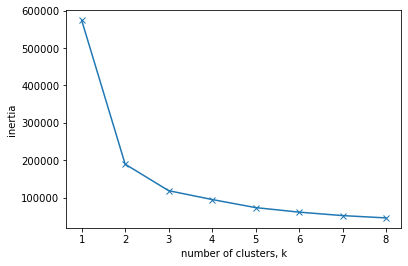

In [38]:
#calculate the elbow graph to check which no. of cluster is better 

%matplotlib inline
#plot ks vs intertias
plt.plot(ks, inertias, '-x')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [284]:
model = KMeans(n_clusters = 3,precompute_distances = 'auto', algorithm = 'elkan', n_init=50) 

In [285]:
labels = model.fit_predict(samples) # derive the value of cluster no. 

In [286]:
#clustering will differ across different devices
df = pd.DataFrame({'labels': labels, 'v_type': v_type})
ct = pd.crosstab(df['labels'], df['v_type'])
ct # to check whether clustering is happening in proper way or n


v_type,movie,tv_series
labels,,
0,53,113
1,25,188
2,89,33


In [287]:
#to implement visualization we need to have PCA of data to 2 dimenstion then only we can only do in 2D
#import the libraries
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [288]:
df3.head()

,ratingdesc,releaseyr,urscore,ursize
0,60.0,2015,96.000000,80
2,60.0,2016,74.000000,80
3,60.0,2014,84.104167,82
4,60.0,2003,64.000000,80
5,60.0,2001,96.000000,80


In [289]:
x = df2[['rating', 'urscore', 'Title']].values # seeing custers in terms of rating urscore and title 

In [290]:
Scene = dict(xaxis = dict(title  = 'rating'), yaxis = dict(title  = 'urscore'), zaxis = dict(title  = 'Title'))
#model.labels_ is nothing but the predicted clusters i.e. y_clusters
labels = model.labels_
trace = go.Scatter3d(x = x[:, 0], y = x[:, 1], z = x[:, 2], mode = 'markers', marker = dict(color = labels, size = 10, line = dict(color = 'black', width = 10)))
layout = go.Layout(margin = dict(l = 0, r = 0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#scroll to zoom in and out and drag to see in 3D

In [165]:
x = df2[['rating', 'urscore', 'releaseyr']].values ## seeing custers in terms of rating urscore and release yr

In [166]:
Scene = dict(xaxis = dict(title  = 'rating'), yaxis = dict(title  = 'urscore'), zaxis = dict(title  = 'releaseyr'))
#model.labels_ is nothing but the predicted clusters i.e. y_clusters
labels = model.labels_
trace = go.Scatter3d(x = x[:, 0], y = x[:, 1], z = x[:, 2], mode = 'markers', marker = dict(color = labels, size = 10, line = dict(color = 'black', width = 10)))
layout = go.Layout(margin = dict(l = 0, r = 0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## PART 2  Clustering based on 'ratingdesc' Column

In [ ]:
#everything remains same, just clustering column is changed from type to rating 

In [167]:
df3=df2.copy(deep =True)

In [168]:
df3.head()

,Title,rating,Domain,ratingdesc,releaseyr,urscore,ursize,type
0,Minions,PG,action and rude humor,60.0,2015,96.000000,80,movie
2,Ratchet and Clank,PG,action and some rude humor,60.0,2016,74.000000,80,movie
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60.0,2014,84.104167,82,movie
4,Spy Kids 3: Game Over,PG,action sequences and peril,60.0,2003,64.000000,80,movie
5,Atlantis: The Lost Empire,PG,action violence,60.0,2001,96.000000,80,movie


In [169]:
rating_type = df3['rating'] #this time we have taken ratings as column to be clustered 
del df3['rating']
del df3['type']
del df3['Title']
del df3["Domain"]

In [170]:
samples1 = df3.values
samples1

array([[  60.        , 2015.        ,   96.        ,   80.        ],
       [  60.        , 2016.        ,   74.        ,   80.        ],
       [  60.        , 2014.        ,   84.10416667,   82.        ],
       ...,
       [  90.        , 2016.        ,   82.87012987,   82.        ],
       [ 110.        , 2017.        ,   84.825     ,   82.        ],
       [ 110.        , 2017.        ,   84.825     ,   82.        ]])

In [171]:
ks = range(1, 8)
inertias = [] #within sum of square distance

for k in ks:
    #create a KMeans instance with k clusters model
    model = KMeans(n_clusters = k)
    
    #fit model to samples
    model.fit(samples)
    
    #append the inertia to the list of inertias
    inertias.append(model.inertia_)

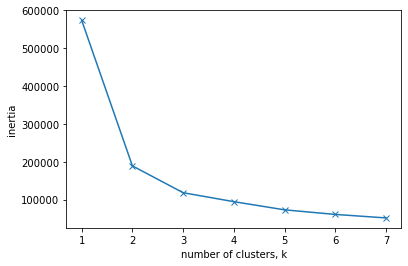

In [172]:
#calculate the elbow graph to check which no. of cluster is better 
%matplotlib inline
#plot ks vs intertias
plt.plot(ks, inertias, '-x')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [220]:
model = KMeans(n_clusters = 5)

In [221]:
labels = model.fit_predict(samples) # derive the value of cluster no. 

In [222]:
#clustering will differ across different devices
df = pd.DataFrame({'labels': labels, 'rating_type': rating_type})
ct = pd.crosstab(df['labels'], df['rating_type'])
ct
#to implement visualization we need to have PCA of data to 2 dimenstion then only we can only do in 2D


rating_type,G,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
labels,,,,,,,,,,,,,
0,0,0,0,12,11,106,0,0,0,0,0,0,0
1,53,0,0,0,0,0,29,0,0,0,23,25,0
2,0,10,0,0,3,0,0,82,0,0,0,0,1
3,0,0,77,0,0,0,0,0,33,0,0,0,0
4,0,0,0,0,0,0,0,0,0,36,0,0,0


In [223]:
#import the libraries
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [179]:
x = df2[['rating', 'urscore', 'releaseyr']].values

In [180]:
Scene = dict(xaxis = dict(title  = 'rating'), yaxis = dict(title  = 'urscore'), zaxis = dict(title  = 'ratingdesc'))
#model.labels_ is nothing but the predicted clusters i.e. y_clusters
labels = model.labels_
trace = go.Scatter3d(x = x[:, 0], y = x[:, 1], z = x[:, 2], mode = 'markers', marker = dict(color = labels, size = 10, line = dict(color = 'black', width = 10)))
layout = go.Layout(margin = dict(l = 0, r = 0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [181]:
x = df2[['rating', 'urscore', 'Title']].values

In [182]:
Scene = dict(xaxis = dict(title  = 'rating'), yaxis = dict(title  = 'urscore'), zaxis = dict(title  = 'Title'))
#model.labels_ is nothing but the predicted clusters i.e. y_clusters
labels = model.labels_
trace = go.Scatter3d(x = x[:, 0], y = x[:, 1], z = x[:, 2], mode = 'markers', marker = dict(color = labels, size = 10, line = dict(color = 'black', width = 10)))
layout = go.Layout(margin = dict(l = 0, r = 0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()